# Delitos en CABA (2019|2023) 

## Introducción

El objetivo de este notebook, es analizar a los delitos llevados a cabo en los años 2019 y 2023, para ver los contrastes, los cambios, y como cambiaron con una pandemia entre medio, analizando sus características y como afectan a la sociedad. Luego por medio de las visualizaciones veremos dichos cambios mas claramente.

In [3]:
#Primero importaremos las herramientas necesarias para este proyecto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importemos las tablas a analizar
d2019 = pd.read_csv("C:\\Users\subri\OneDrive\Documentos\cursos ciencia de datos\proyectos\PyAD\delitos_2019.csv")
d2019.info()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\subri\AppData\Local\Temp\ipykernel_20956\2935464091.py:2: SyntaxWarning: invalid escape sequence '\s'
  d2019 = pd.read_csv("C:\\Users\subri\OneDrive\Documentos\cursos ciencia de datos\proyectos\PyAD\delitos_2019.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149524 entries, 0 to 149523
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id-mapa   149524 non-null  int64  
 1   anio      149524 non-null  int64  
 2   mes       149524 non-null  object 
 3   dia       149524 non-null  object 
 4   fecha     149524 non-null  object 
 5   franja    149517 non-null  float64
 6   tipo      149524 non-null  object 
 7   subtipo   149524 non-null  object 
 8   uso_arma  149524 non-null  object 
 9   uso_moto  149524 non-null  object 
 10  barrio    147364 non-null  object 
 11  comuna    147364 non-null  float64
 12  latitud   147367 non-null  float64
 13  longitud  147367 non-null  float64
 14  cantidad  149524 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 17.1+ MB


In [7]:
# Un mapeo del orden correcto de los meses
meses_orden = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
               'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Pasamos a Categorical, para ordenar la columna mes dependiendo el orden de la variable de arriba 
d2019['mes'] = pd.Categorical(d2019['mes'], categories=meses_orden, ordered=True)
d2019

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,252569,2019,ENERO,LUNES,2019-01-28,8.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.630835,-58.391528,1
1,252570,2019,MARZO,LUNES,2019-03-04,11.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.628442,-58.391876,1
2,252571,2019,ABRIL,MIERCOLES,2019-04-10,18.0,Robo,Robo total,NO,NO,PARQUE PATRICIOS,4.0,-34.630313,-58.391512,1
3,252572,2019,NOVIEMBRE,LUNES,2019-11-18,12.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.630163,-58.391542,1
4,252573,2019,ABRIL,LUNES,2019-04-01,17.0,Robo,Robo total,NO,NO,PARQUE PATRICIOS,4.0,-34.629944,-58.391882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149519,1114206,2019,DICIEMBRE,JUEVES,2019-12-05,17.0,Vialidad,Muertes por siniestros viales,NO,NO,VILLA URQUIZA,12.0,-34.582660,-58.491074,1
149520,1114207,2019,DICIEMBRE,MARTES,2019-12-17,4.0,Vialidad,Muertes por siniestros viales,NO,NO,NUEVA POMPEYA,4.0,-34.649907,-58.421028,1
149521,1114208,2019,DICIEMBRE,MARTES,2019-12-17,14.0,Vialidad,Muertes por siniestros viales,NO,NO,LINIERS,9.0,-34.641435,-58.522192,1
149522,1114209,2019,DICIEMBRE,SABADO,2019-12-21,4.0,Vialidad,Muertes por siniestros viales,NO,NO,FLORESTA,10.0,-34.632058,-58.474604,1


In [117]:
#lo mismo con dias 
dias_orden = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO',
               'DOMINGO']

d2019['dia'] = pd.Categorical(d2019['dia'], categories=dias_orden, ordered=True)
d2019

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,252569,2019,ENERO,LUNES,2019-01-28,8.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.630835,-58.391528,1
1,252570,2019,MARZO,LUNES,2019-03-04,11.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.628442,-58.391876,1
2,252571,2019,ABRIL,MIERCOLES,2019-04-10,18.0,Robo,Robo total,NO,NO,PARQUE PATRICIOS,4.0,-34.630313,-58.391512,1
3,252572,2019,NOVIEMBRE,LUNES,2019-11-18,12.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.630163,-58.391542,1
4,252573,2019,ABRIL,LUNES,2019-04-01,17.0,Robo,Robo total,NO,NO,PARQUE PATRICIOS,4.0,-34.629944,-58.391882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149519,1114206,2019,DICIEMBRE,JUEVES,2019-12-05,17.0,Vialidad,Muertes por siniestros viales,NO,NO,VILLA URQUIZA,12.0,-34.582660,-58.491074,1
149520,1114207,2019,DICIEMBRE,MARTES,2019-12-17,4.0,Vialidad,Muertes por siniestros viales,NO,NO,NUEVA POMPEYA,4.0,-34.649907,-58.421028,1
149521,1114208,2019,DICIEMBRE,MARTES,2019-12-17,14.0,Vialidad,Muertes por siniestros viales,NO,NO,LINIERS,9.0,-34.641435,-58.522192,1
149522,1114209,2019,DICIEMBRE,SABADO,2019-12-21,4.0,Vialidad,Muertes por siniestros viales,NO,NO,FLORESTA,10.0,-34.632058,-58.474604,1


In [9]:
d2019= d2019.rename(columns={'id-mapa':'id_mapa'})
d2019

,id_mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,252569,2019,ENERO,LUNES,2019-01-28,8.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.630835,-58.391528,1
1,252570,2019,MARZO,LUNES,2019-03-04,11.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.628442,-58.391876,1
2,252571,2019,ABRIL,MIERCOLES,2019-04-10,18.0,Robo,Robo total,NO,NO,PARQUE PATRICIOS,4.0,-34.630313,-58.391512,1
3,252572,2019,NOVIEMBRE,LUNES,2019-11-18,12.0,Hurto,Hurto total,NO,NO,PARQUE PATRICIOS,4.0,-34.630163,-58.391542,1
4,252573,2019,ABRIL,LUNES,2019-04-01,17.0,Robo,Robo total,NO,NO,PARQUE PATRICIOS,4.0,-34.629944,-58.391882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149519,1114206,2019,DICIEMBRE,JUEVES,2019-12-05,17.0,Vialidad,Muertes por siniestros viales,NO,NO,VILLA URQUIZA,12.0,-34.582660,-58.491074,1
149520,1114207,2019,DICIEMBRE,MARTES,2019-12-17,4.0,Vialidad,Muertes por siniestros viales,NO,NO,NUEVA POMPEYA,4.0,-34.649907,-58.421028,1
149521,1114208,2019,DICIEMBRE,MARTES,2019-12-17,14.0,Vialidad,Muertes por siniestros viales,NO,NO,LINIERS,9.0,-34.641435,-58.522192,1
149522,1114209,2019,DICIEMBRE,SABADO,2019-12-21,4.0,Vialidad,Muertes por siniestros viales,NO,NO,FLORESTA,10.0,-34.632058,-58.474604,1


In [11]:
d2023 = pd.read_csv("C:\\Users\subri\OneDrive\Documentos\cursos ciencia de datos\proyectos\PyAD\delitos_2023.csv", sep=None, engine='python')
d2023
d2023.info()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\subri\AppData\Local\Temp\ipykernel_20956\639822581.py:1: SyntaxWarning: invalid escape sequence '\s'
  d2023 = pd.read_csv("C:\\Users\subri\OneDrive\Documentos\cursos ciencia de datos\proyectos\PyAD\delitos_2023.csv", sep=None, engine='python')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157461 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ﻿id-sum   157461 non-null  int64 
 1   anio      157461 non-null  int64 
 2   mes       157461 non-null  object
 3   dia       157461 non-null  object
 4   fecha     157461 non-null  object
 5   franja    157461 non-null  int64 
 6   tipo      157461 non-null  object
 7   subtipo   157461 non-null  object
 8   uso_arma  157461 non-null  object
 9   uso_moto  157461 non-null  object
 10  barrio    156779 non-null  object
 11  comuna    156795 non-null  object
 12  latitud   154642 non-null  object
 13  longitud  154642 non-null  object
 14  cantidad  157461 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 18.0+ MB


In [13]:
d2023 = d2023.rename(columns={'id-sum': 'id_sum'})

In [15]:
# Lo mismo para 2023
meses_orden3 = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
               'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Pasamos a Categorical, para ordenar la columna mes dependiendo el orden de la variable de arriba 
d2023['mes'] = pd.Categorical(d2023['mes'], categories=meses_orden3, ordered=True)
d2023

,﻿id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,ENERO,LUNES,2/01/2023,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58.445.747,-34.559.570,1
1,2,2023,ENERO,MIERCOLES,11/01/2023,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58.476.557,-34.673.096,1
2,3,2023,ENERO,VIERNES,13/01/2023,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58.485.670,-34.544.011,1
3,4,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
4,5,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157456,157457,2023,DICIEMBRE,VIERNES,1/12/2023,14,Homicidios,Homicidio Doloso,NO,NO,PARQUE CHACABUCO,7,NaN,NaN,1
157457,157458,2023,DICIEMBRE,DOMINGO,17/12/2023,23,Homicidios,Homicidio Doloso,NO,NO,MONSERRAT,1,NaN,NaN,1
157458,157459,2023,DICIEMBRE,DOMINGO,24/12/2023,22,Homicidios,Homicidio Doloso,NO,NO,VILLA CRESPO,15,NaN,NaN,1
157459,157460,2023,DICIEMBRE,DOMINGO,24/12/2023,17,Homicidios,Homicidio Doloso,NO,NO,BALVANERA,3,NaN,NaN,1


In [125]:
#lo mismo con dias 
dias_orden3 = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO',
               'DOMINGO']

d2023['dia'] = pd.Categorical(d2023['dia'], categories=dias_orden3, ordered=True)
d2023

,﻿id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,ENERO,LUNES,2/01/2023,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58.445.747,-34.559.570,1
1,2,2023,ENERO,MIERCOLES,11/01/2023,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58.476.557,-34.673.096,1
2,3,2023,ENERO,VIERNES,13/01/2023,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58.485.670,-34.544.011,1
3,4,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
4,5,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157456,157457,2023,DICIEMBRE,VIERNES,1/12/2023,14,Homicidios,Homicidio Doloso,NO,NO,PARQUE CHACABUCO,7,NaN,NaN,1
157457,157458,2023,DICIEMBRE,DOMINGO,17/12/2023,23,Homicidios,Homicidio Doloso,NO,NO,MONSERRAT,1,NaN,NaN,1
157458,157459,2023,DICIEMBRE,DOMINGO,24/12/2023,22,Homicidios,Homicidio Doloso,NO,NO,VILLA CRESPO,15,NaN,NaN,1
157459,157460,2023,DICIEMBRE,DOMINGO,24/12/2023,17,Homicidios,Homicidio Doloso,NO,NO,BALVANERA,3,NaN,NaN,1


In [17]:
d2023

,﻿id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,ENERO,LUNES,2/01/2023,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58.445.747,-34.559.570,1
1,2,2023,ENERO,MIERCOLES,11/01/2023,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58.476.557,-34.673.096,1
2,3,2023,ENERO,VIERNES,13/01/2023,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58.485.670,-34.544.011,1
3,4,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
4,5,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157456,157457,2023,DICIEMBRE,VIERNES,1/12/2023,14,Homicidios,Homicidio Doloso,NO,NO,PARQUE CHACABUCO,7,NaN,NaN,1
157457,157458,2023,DICIEMBRE,DOMINGO,17/12/2023,23,Homicidios,Homicidio Doloso,NO,NO,MONSERRAT,1,NaN,NaN,1
157458,157459,2023,DICIEMBRE,DOMINGO,24/12/2023,22,Homicidios,Homicidio Doloso,NO,NO,VILLA CRESPO,15,NaN,NaN,1
157459,157460,2023,DICIEMBRE,DOMINGO,24/12/2023,17,Homicidios,Homicidio Doloso,NO,NO,BALVANERA,3,NaN,NaN,1


In [18]:
# A continuación analicemos las tablas por separado

# <center>Analicemos a estos data frame, diviendo en fechas, tipo y zona</center>

## Veamos el análisis de las fechas

# 2019

In [35]:
#Veamos la cantidad del 2019
delitos_anio = d2019.groupby('anio').size()
delitos_anio

anio
2019    149524
dtype: int64

### 2019:149524 delitos

In [127]:
#Analicemos por mes
delitos_mes= d2019.groupby('mes').size()
delitos_mes

C:\Users\subri\AppData\Local\Temp\ipykernel_9444\1100641757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delitos_mes= d2019.groupby('mes').size()


mes
ENERO         13109
FEBRERO       12268
MARZO         13743
ABRIL         12578
MAYO          12543
JUNIO         11625
JULIO         11879
AGOSTO        12057
SEPTIEMBRE    12078
OCTUBRE       12546
NOVIEMBRE     12807
DICIEMBRE     12291
dtype: int64

### El mes con mayor delitos fue: Marzo(13743)

In [129]:
#Veamos la cantidad por día y los días con mayor delito, pero a ordenarlo
delitos_día = d2019.groupby('dia').size()
delitos_día

C:\Users\subri\AppData\Local\Temp\ipykernel_9444\1589896259.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delitos_día = d2019.groupby('dia').size()


dia
LUNES        22518
MARTES       22021
MIERCOLES    22131
JUEVES       21913
VIERNES      23356
SABADO       19766
DOMINGO      17819
dtype: int64

#### El día con mayor delitos del año fue: Viernes(23356)

In [69]:
#Veamos la hora que mas se llevarona cabo delitos
delitos_hora = d2019.groupby('franja').size()
delitos_hora

franja
0.0     11719
1.0      3153
2.0      2473
3.0      2130
4.0      2113
5.0      2463
6.0      2872
7.0      3472
8.0      5275
9.0      5532
10.0     6525
11.0     6839
12.0     7936
13.0     7448
14.0     7986
15.0     7818
16.0     8139
17.0     8159
18.0     9023
19.0     9014
20.0     8874
21.0     7966
22.0     6969
23.0     5619
dtype: int64

### En la madrugada, en la franja de las: 00:00 hs(12pm), se llevan a cabo mas delitos

In [150]:
#La fecha mas violenta
conteo_fechas = d2019['fecha'].value_counts()
conteo_fechas

fecha
2019-03-11    564
2019-11-02    539
2019-03-08    536
2019-03-06    524
2019-04-01    521
             ... 
2019-06-20    272
2019-08-11    264
2019-05-01    262
2019-06-17    246
2019-12-25    240
Name: count, Length: 365, dtype: int64

#### La Fecha mas violenta: 11-03-2019

# 2023

In [68]:
#Veamos la cantidad del 2023
delitos_anio3 = d2023.groupby('anio').size()
delitos_anio3

anio
2023    157461
dtype: int64

### 2023: 157461 delitos

In [131]:
#Veamos por la cantidad por mes
delitos3_mes = d2023.groupby('mes').size()
delitos3_mes

C:\Users\subri\AppData\Local\Temp\ipykernel_9444\1914754406.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delitos3_mes = d2023.groupby('mes').size()


mes
ENERO         12037
FEBRERO       11475
MARZO         14180
ABRIL         12690
MAYO          13425
JUNIO         12469
JULIO         13383
AGOSTO        13312
SEPTIEMBRE    13271
OCTUBRE       13320
NOVIEMBRE     13598
DICIEMBRE     14301
dtype: int64

### El mes con mayor delitos fue: Diciembre(14301)

In [133]:
#Veamos la cantidad por día y los días con mayor delito
delitos3_día = d2023.groupby('dia').size()
delitos3_día

C:\Users\subri\AppData\Local\Temp\ipykernel_9444\3487365630.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delitos3_día = d2023.groupby('dia').size()


dia
LUNES        22438
MARTES       22933
MIERCOLES    18736
JUEVES       23277
VIERNES      24072
SABADO       18281
DOMINGO      19514
dtype: int64

### El día con mayor delito fue: Jueves(23277)

In [122]:
#Veamos la hora que mas se llevarona cabo delitos
delitos3_hora = d2023.groupby('franja').size()
delitos3_hora

franja
0     6049
1     3497
2     2816
3     2849
4     2967
5     3531
6     5258
7     7823
8     8291
9     7122
10    7237
11    6677
12    8112
13    6989
14    7311
15    7472
16    7741
17    8404
18    8896
19    8767
20    8594
21    7768
22    7091
23    6199
dtype: int64

### En la tarde, en la franja de: 18:00hs(6pm), se llevan a cabo mas delitos

In [154]:
#La fecha mas violenta
conteo_fechas = d2023['fecha'].value_counts()
conteo_fechas

fecha
4/11/2023     732
15/12/2023    625
19/12/2023    607
14/12/2023    539
20/12/2023    537
             ... 
16/05/2023      1
11/05/2023      1
9/05/2023       1
7/05/2023       1
2/01/2023       1
Name: count, Length: 420, dtype: int64

#### La fecha mas violenta: 4/11/2023

## Resumen:

### 2019: Fecha con mas delitos: Marzo
    Día con mas delitos: Viernes
    Horario: 12pm(00:00hs)
    Fecha: 11-03-2019

### 2023: Fecha con mas delitos: Diciembre
    Día con mas delitos: Jueves
    Horario: 6pm(18:00hs)
    Fecha: 4-11-2023

# Análisis del tipo y modo del delito 

## 2019

### Tipo de robo, subtipo, uso de arma y movilidad

In [27]:
#Tipos de Robo
delitos_tipo = d2019.groupby('tipo').size()
delitos_tipo

tipo
Amenazas      11850
Homicidios      102
Hurto         49351
Lesiones      15215
Robo          62829
Vialidad      10177
dtype: int64

### Delito mas recurrente: Amenazas

In [31]:
#Subtipos
delitos_subtipo= d2019.groupby('subtipo').size()
delitos_subtipo

subtipo
Amenazas                          11850
Femicidios                            9
Homicidios dolosos                   93
Hurto automotor                    4653
Hurto total                       44698
Lesiones Dolosas                  15215
Lesiones por siniestros viales    10073
Muertes por siniestros viales       104
Robo automotor                     1424
Robo total                        61405
dtype: int64

### Sub_tipo mas recurrente: Amenazas
    Seguido por: robo total

In [49]:
#Uso de arma
delitos_arma= d2019.groupby('uso_arma').size()
delitos_arma

uso_arma
NO    135925
SI     13599
dtype: int64

### De todos los delitos registrados, en: 13 599, se usaron arma

In [90]:
# En que tipos y subtipos se usaron arma
tipo_arma= d2019[d2019['uso_arma'] == 'SI'].groupby('tipo').size()
tipo_arma

tipo
Robo    13599
dtype: int64

In [96]:
subtipo_arma= d2019[d2019['uso_arma']=='SI'].groupby('subtipo').size()
subtipo_arma

subtipo
Robo automotor     1193
Robo total        12406
dtype: int64

In [100]:
#Movilidad:
movilidad_delito= d2019.groupby('uso_moto').size()
movilidad_delito

uso_moto
NO    140164
SI      9360
dtype: int64

### En Moto, se registran el uso de esta en: 9360 veces

# 2023

## Tipo de robo, subtipo, uso de arma y movilidad

In [105]:
#Tipos de delito
delitos3_tipo = d2023.groupby('tipo').size()
delitos3_tipo

tipo
Amenazas       8332
Homicidios       91
Hurto         62567
Lesiones      11045
Robo          64983
Vialidad      10443
dtype: int64

### Delito mas recurrente: Robo
    Seguido por el: Hurto

In [108]:
# Subtipos de delito
delitos3_subtipo= d2023.groupby('subtipo').size()
delitos3_subtipo

subtipo
Amenazas                           8332
Homicidio Doloso                     91
Hurto automotor                    4494
Hurto total                       58073
Lesiones Dolosas                  11045
Lesiones por siniestros viales    10339
Muertes por siniestros viales       104
Robo automotor                      904
Robo total                        64079
dtype: int64

### Sub_Tipo recurrente: Robo total

In [113]:
#Uso de arma
delitos3_arma= d2023.groupby('uso_arma').size()
delitos3_arma

uso_arma
NO    148208
SI      9253
dtype: int64

### De todos los delitos registrados, en: 9253 se usaron armas

In [116]:
# En que tipos y subtipos se usaron arma
tipo_arma3= d2023[d2023['uso_arma'] == 'SI'].groupby('tipo').size()
tipo_arma3

tipo
Robo    9253
dtype: int64

In [120]:
subtipo_arma3= d2023[d2023['uso_arma']=='SI'].groupby('subtipo').size()
subtipo_arma3

subtipo
Robo automotor     700
Robo total        8553
dtype: int64

In [122]:
#Movilidad:
movilidad_delito3= d2023.groupby('uso_moto').size()
movilidad_delito3

uso_moto
NO    153014
SI      4447
dtype: int64

### En Moto, se registran el uso de esta en: 4447 veces

# Análisis a nivel Geográfico

# 2019

### Por Barrio

In [24]:
#Barrio
delitos_barrio = d2019.groupby('barrio').size()
delitos_barrio

barrio
AGRONOMIA              555
ALMAGRO               5887
BALVANERA            11002
BARRACAS              5151
BELGRANO              4737
BOCA                  2575
BOEDO                 2250
CABALLITO             6103
CHACARITA             1901
COGHLAN                603
COLEGIALES            1764
CONSTITUCION          4696
FLORES                7542
FLORESTA              1987
LINIERS               2345
MATADEROS             3285
MONSERRAT             3947
MONTE CASTRO          1181
NUEVA POMPEYA         3476
NUÑEZ                 2145
PALERMO              11361
PARQUE AVELLANEDA     2457
PARQUE CHACABUCO      2698
PARQUE CHAS            607
PARQUE PATRICIOS      2494
PATERNAL               923
PUERTO MADERO          354
RECOLETA              6680
RETIRO                4897
SAAVEDRA              2274
SAN CRISTOBAL         2452
SAN NICOLAS           7107
SAN TELMO             1870
VELEZ SARSFIELD       1318
VERSALLES              520
VILLA CRESPO          3882
VILLA DEL PARQUE     

#### Barrio con mayor delito: Palermo
    Barrio con menor delito: Puerto Madero

In [31]:
barrio_subtipo = d2019.groupby(['barrio', 'subtipo']).size()
barrio_subtipo

barrio         subtipo                       
AGRONOMIA      Amenazas                            27
               Hurto automotor                     21
               Hurto total                        149
               Lesiones Dolosas                    38
               Lesiones por siniestros viales      80
                                                 ... 
VILLA URQUIZA  Lesiones Dolosas                   215
               Lesiones por siniestros viales     228
               Muertes por siniestros viales        2
               Robo automotor                       7
               Robo total                        1195
Length: 414, dtype: int64

### Por Comuna:

In [35]:
delitos_comuna = d2019.groupby('comuna').size()
delitos_comuna

comuna
1.0     22871
2.0      6680
3.0     13454
4.0     13696
5.0      8137
6.0      6103
7.0     10240
8.0      8675
9.0      8087
10.0     6704
11.0     6720
12.0     7301
13.0     8646
14.0    11361
15.0     8689
dtype: int64

### A nivel comuna, la comuna con mayor delito: Comuna 1

# 2023

In [51]:
d2023['barrio'] = d2023['barrio'].str.upper().str.strip()

In [36]:
# Un par de normalizaciones
duplicado_barrios = {
    'CONTITUCIÓN': 'CONSTITUCION',
    'VILLA ´PUEYRREDON': 'VILLA PUEYRREDON',
    'LA BOCA': 'BOCA',
    'NUNEZ': 'NUÑEZ', 
    'VILLA GENERAL MITRE': 'VILLA GRAL. MITRE',
    'AV BOEDO':'BOEDO'
}
d2023['barrio'] = d2023['barrio'].replace(duplicado_barrios)

In [38]:
# Para olvidarnos de los barrios!= CABA
barrios_no_caba = ['DOCK SUD', 'GREGORIO DE LAFERRERE', 'FLORIDA','BERNAL','VILLA LUZURIAGA','SANTA MARÍA','RODRIGO BUENO','BANFIELD OESTE','CASEROS']
# Usando el método isin, indexamos a las filas donde aparezzcan los barrios que no son de caba
barrios_eliminar = d2023[d2023['barrio'].isin(barrios_no_caba)].index
# Eliminar esas filas
d2023 = d2023.drop(barrios_eliminar)

In [40]:
#Saquemos a los valores faltantes
valores_faltantes2023=  ['NO ESPECIFICADA', 'SIN GEO', '0', 'SD']
d2023['barrio'] = d2023['barrio'].replace(valores_faltantes2023, np.nan)

In [13]:
#Saquemos el máximo de filas de retorno
pd.set_option('display.max_rows', None)

### Por Barrio

In [55]:
#Barrio
delitos3_barrio = d2023.groupby('barrio').size().sort_values(ascending=False)
delitos3_barrio

barrio
PALERMO              13561
BALVANERA             9633
FLORES                8183
RECOLETA              7466
CABALLITO             6421
VILLA LUGANO          6229
SAN NICOLAS           5844
ALMAGRO               5838
BARRACAS              5481
BELGRANO              5007
CONSTITUCION          4621
VILLA CRESPO          4431
RETIRO                4270
MATADEROS             3779
MONSERRAT             3756
VILLA SOLDATI         3387
NUEVA POMPEYA         3358
VILLA DEVOTO          3226
PARQUE CHACABUCO      3222
VILLA URQUIZA         3044
LINIERS               2967
PARQUE AVELLANEDA     2693
BOCA                  2642
PARQUE PATRICIOS      2443
SAN TELMO             2442
NUÑEZ                 2424
SAN CRISTOBAL         2357
SAAVEDRA              2329
CHACARITA             2276
BOEDO                 2116
COLEGIALES            1853
FLORESTA              1842
VILLA DEL PARQUE      1838
VILLA PUEYRREDON      1462
VILLA LURO            1400
VELEZ SARSFIELD       1348
VILLA SANTA RITA     

#### Barrio con mayor número de delitos: Palermo
    Con menor número de delitos: Agronomía

In [76]:
d2023['barrio'].isnull().sum()

1937

### Por Comuna

In [42]:
# Un par de normalizacioc
comunas_duplicadas= {
   'CC-01 NORTE': '1',
    'CC-01 SUR': '1', 
    'CC-02': '2',
    'CC-03': '3',
    'CC-04': '4',
    'CC-05': '5',
    'CC-06': '6',
    'CC-07': '7',
    'CC-08': '8',
    'CC-09': '9',
    'CC-10': '10',
    'CC-11': '11',
    'CC-12': '12',
    'CC-13': '13',
    'CC-14': '14',
    'CC-15': '15'
}
d2023['comuna'] = d2023['comuna'].replace(comunas_duplicadas)

In [80]:
# Comunas
delitos3_comuna = d2023.groupby('comuna').size().sort_values(ascending=False)
delitos3_comuna

comuna
1     21691
4     13983
14    13575
3     12100
7     11584
8     10524
15     9907
9      9452
13     9300
5      7956
11     7696
2      7510
12     7422
10     7310
6      6426
dtype: int64

#### Comuna con mayor número de delitos: Comuna 1
    Con menor número: Comuna 6

In [78]:
#Valores faltantes
comuna_null2023=  ['Sin geo']
d2023['comuna'] = d2023['comuna'].replace(comuna_null2023, np.nan)

# <center>Ahora analicemos pero con visualizaciones para comprender de manera mas cabal a los delitos</center>

## 2019

In [ ]:
# Por Mes del 2019 y la cantidad de delitos

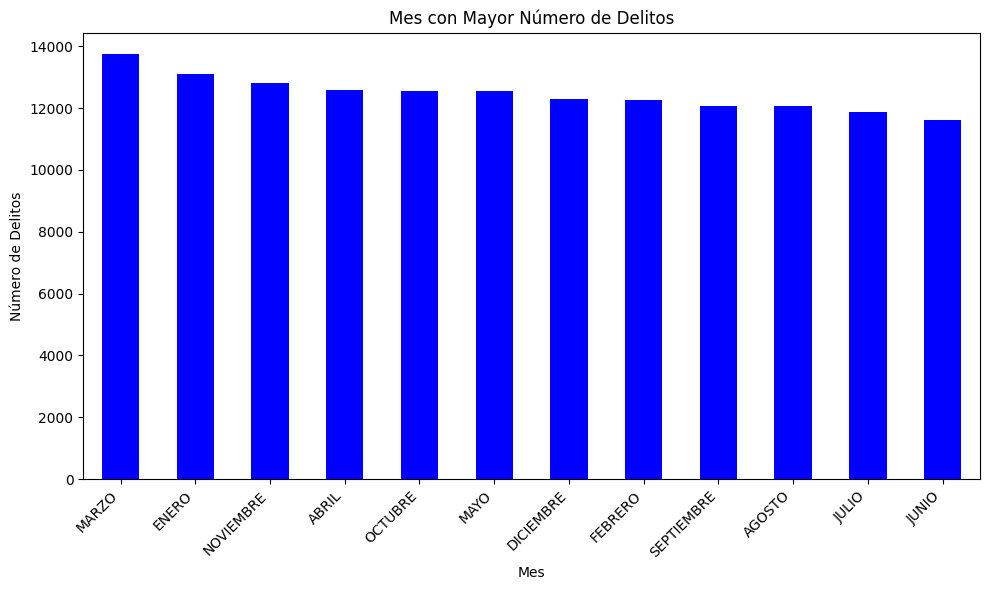

In [172]:
plt.figure(figsize=(10, 6))
d2019['mes'].value_counts().head(12).plot(kind='bar', color='blue')
plt.title('Mes con Mayor Número de Delitos')
plt.xlabel('Mes')
plt.ylabel('Número de Delitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Por Zona Geográfica


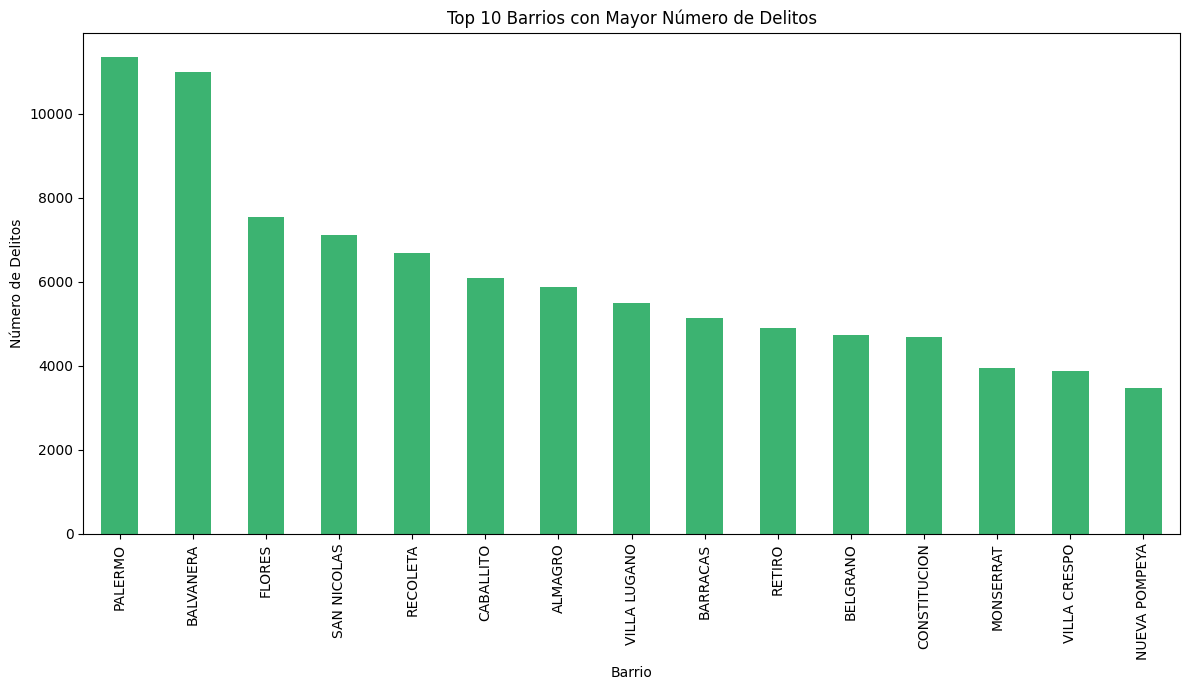

In [180]:
plt.figure(figsize=(12, 7))
d2019['barrio'].value_counts().head(15).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Barrios con Mayor Número de Delitos')
plt.xlabel('Barrio')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

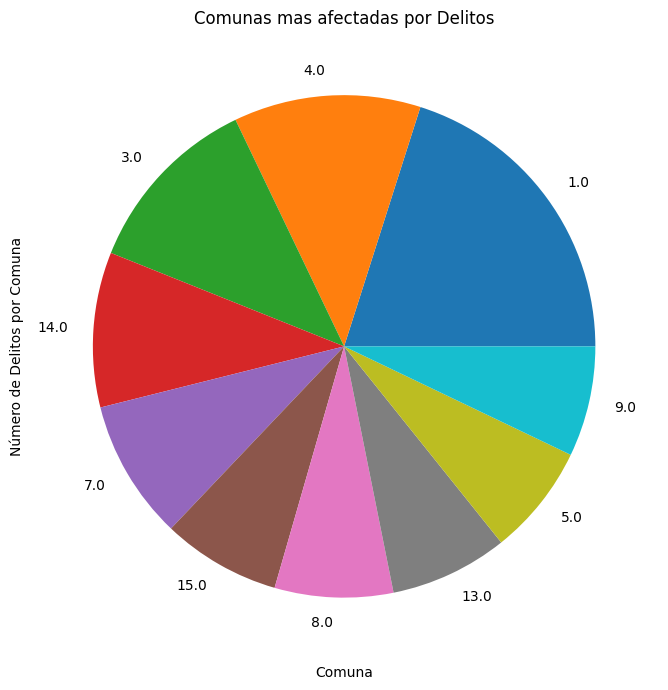

In [30]:
plt.figure(figsize=(12, 7))
d2019['comuna'].value_counts().head(10).plot(kind='pie', color='orange')
plt.title('Comunas mas afectadas por Delitos')
plt.xlabel('Comuna')
plt.ylabel('Número de Delitos por Comuna')
plt.tight_layout()
plt.show()

In [148]:
# Por tipo de Delito

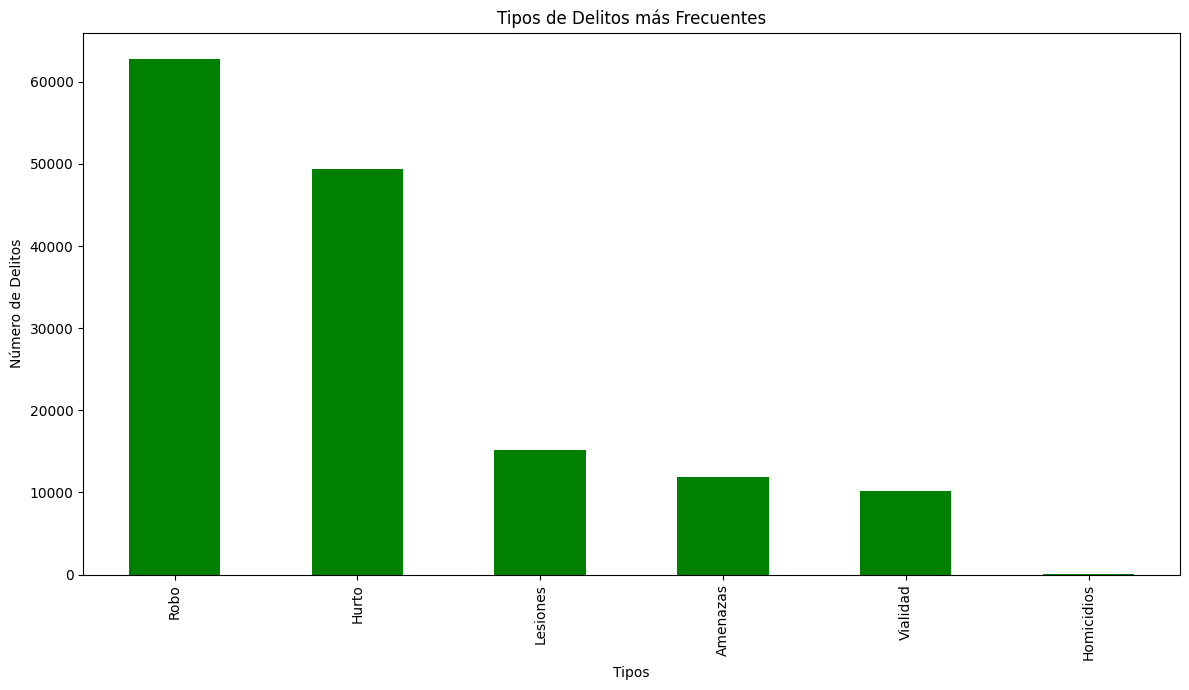

In [176]:
plt.figure(figsize=(12, 7))
d2019['tipo'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Tipos de Delitos más Frecuentes')
plt.xlabel('Tipos')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

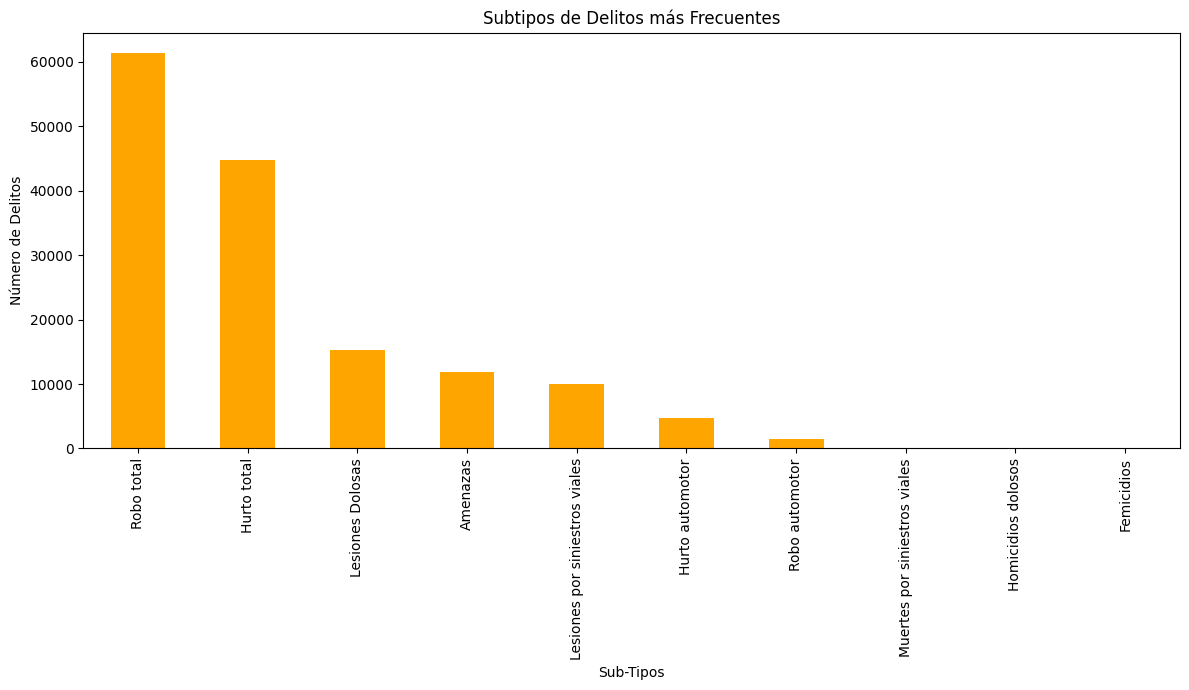

In [182]:
plt.figure(figsize=(12, 7))
d2019['subtipo'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Subtipos de Delitos más Frecuentes')
plt.xlabel('Sub-Tipos')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

In [85]:
#Tipo de Delito por Barrio

C:\Users\subri\AppData\Local\Temp\ipykernel_20956\598501606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=robo_por_barrio.index, y=robo_por_barrio.values,palette='Blues_d')


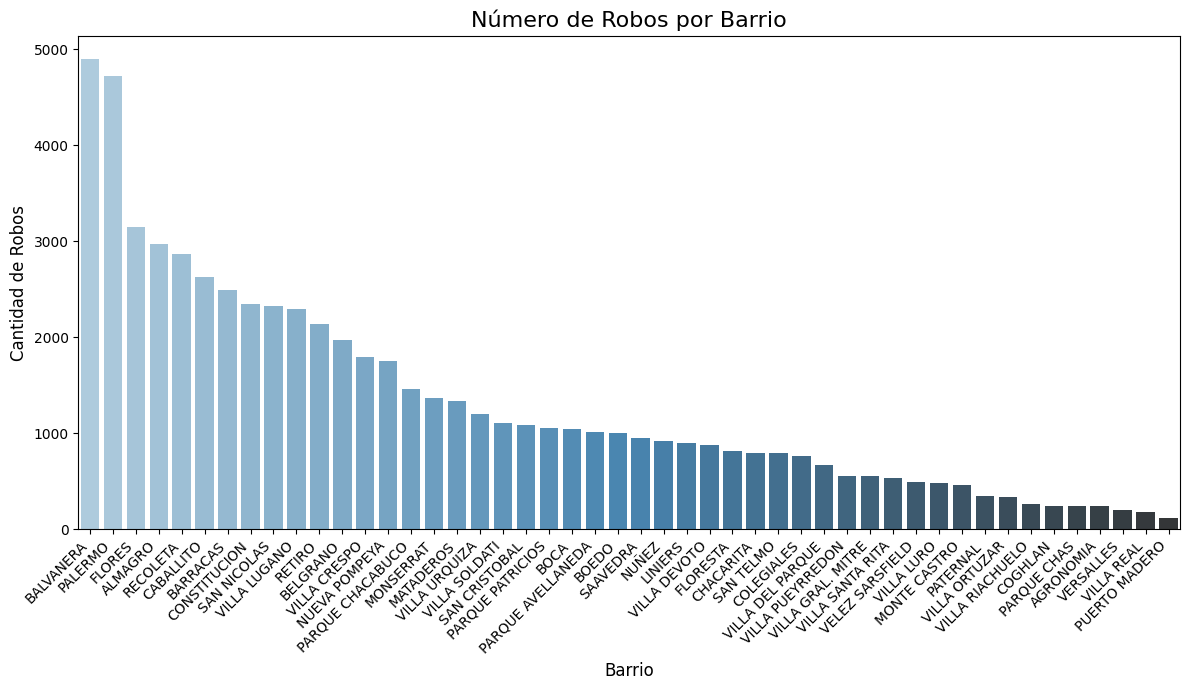

In [95]:
robos19=d2019[d2019['tipo']=='Robo']
robo_por_barrio=robos19['barrio'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(x=robo_por_barrio.index, y=robo_por_barrio.values,palette='Blues_d')
plt.title('Número de Robos por Barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de Robos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\subri\AppData\Local\Temp\ipykernel_20956\27389532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hurto_por_barrio.index, y=hurto_por_barrio.values,palette='Blues_d')


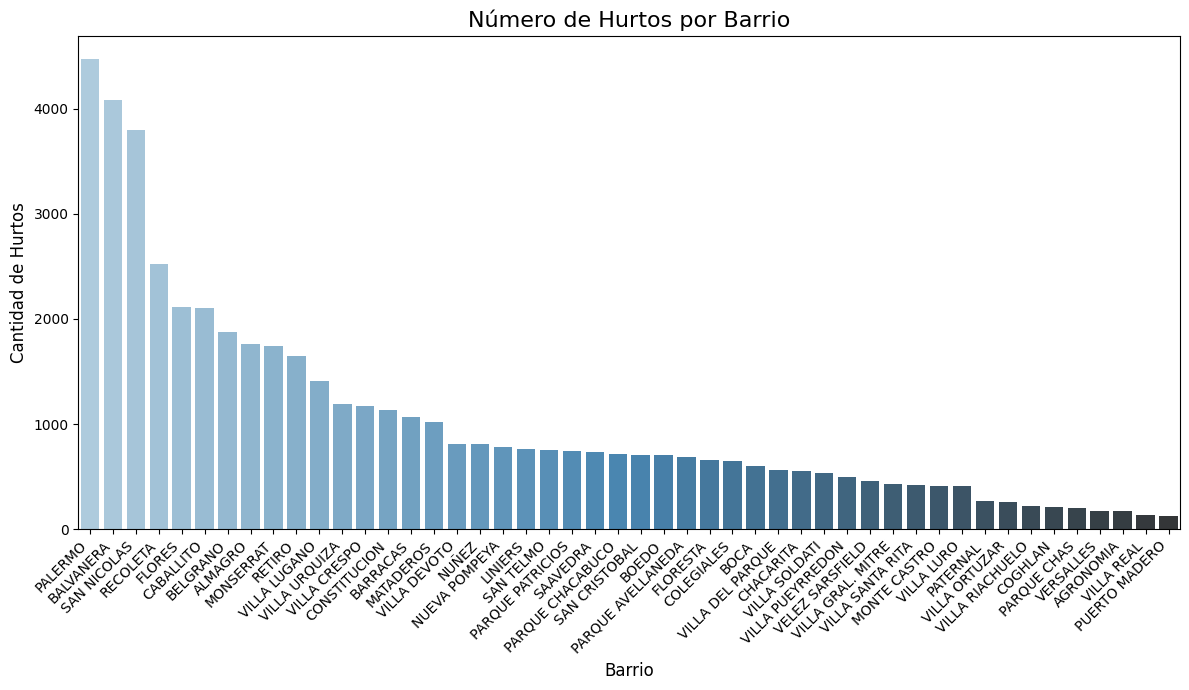

In [113]:
hurtos19=d2019[d2019['tipo']=='Hurto']
hurto_por_barrio=hurtos19['barrio'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(x=hurto_por_barrio.index, y=hurto_por_barrio.values,palette='Blues_d')
plt.title('Número de Hurtos por Barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de Hurtos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\subri\AppData\Local\Temp\ipykernel_20956\3232377937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lesion_por_barrio.index, y=lesion_por_barrio.values,palette='Blues_d')


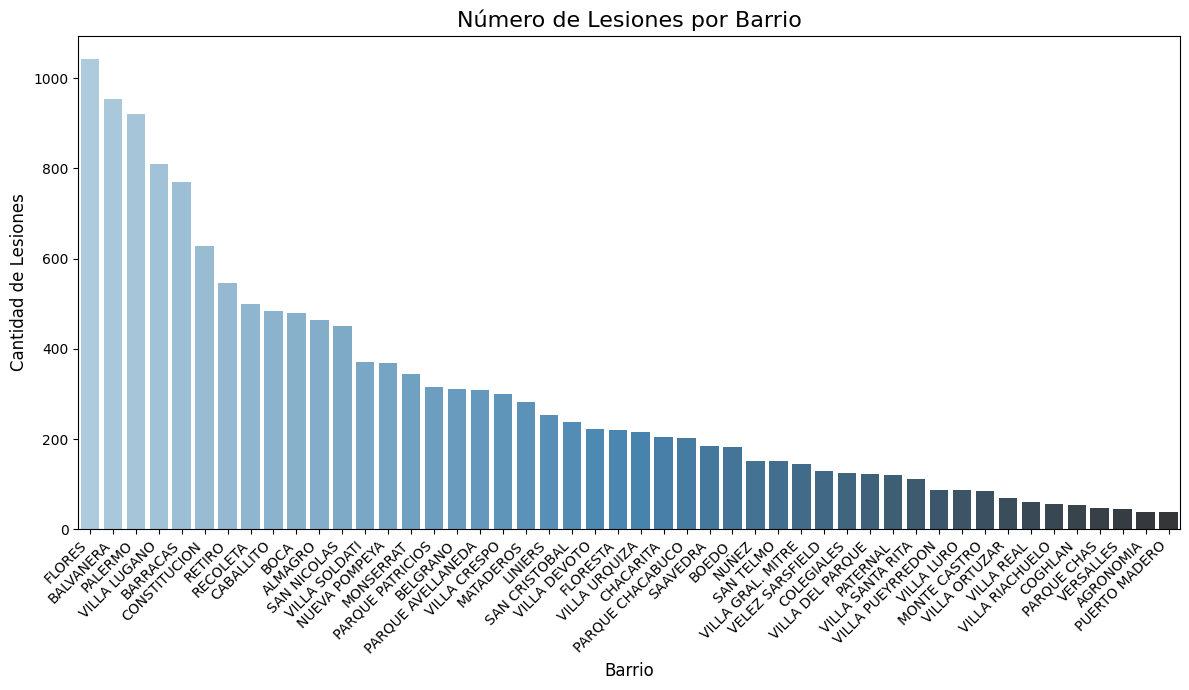

In [115]:
lesiones19=d2019[d2019['tipo']=='Lesiones']
lesion_por_barrio=lesiones19['barrio'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(x=lesion_por_barrio.index, y=lesion_por_barrio.values,palette='Blues_d')
plt.title('Número de Lesiones por Barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de Lesiones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

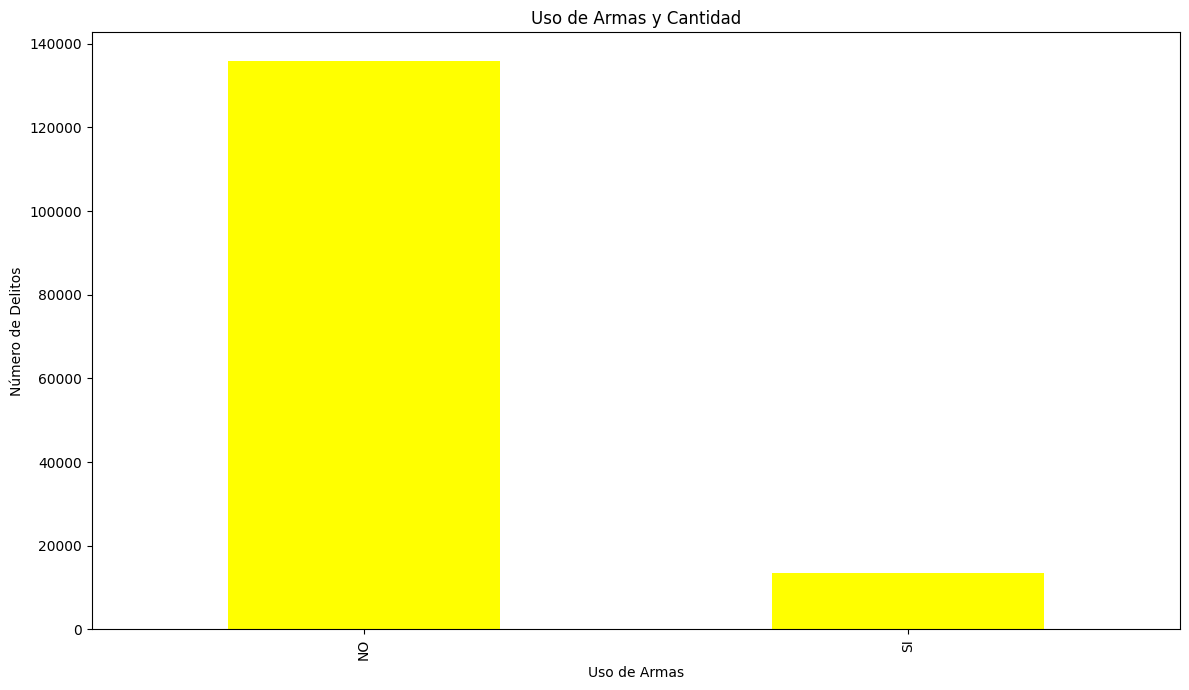

In [93]:
plt.figure(figsize=(12, 7))
d2019['uso_arma'].value_counts().head(10).plot(kind='bar', color='yellow')
plt.title('Uso de Armas y Cantidad')
plt.xlabel('Uso de Armas')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

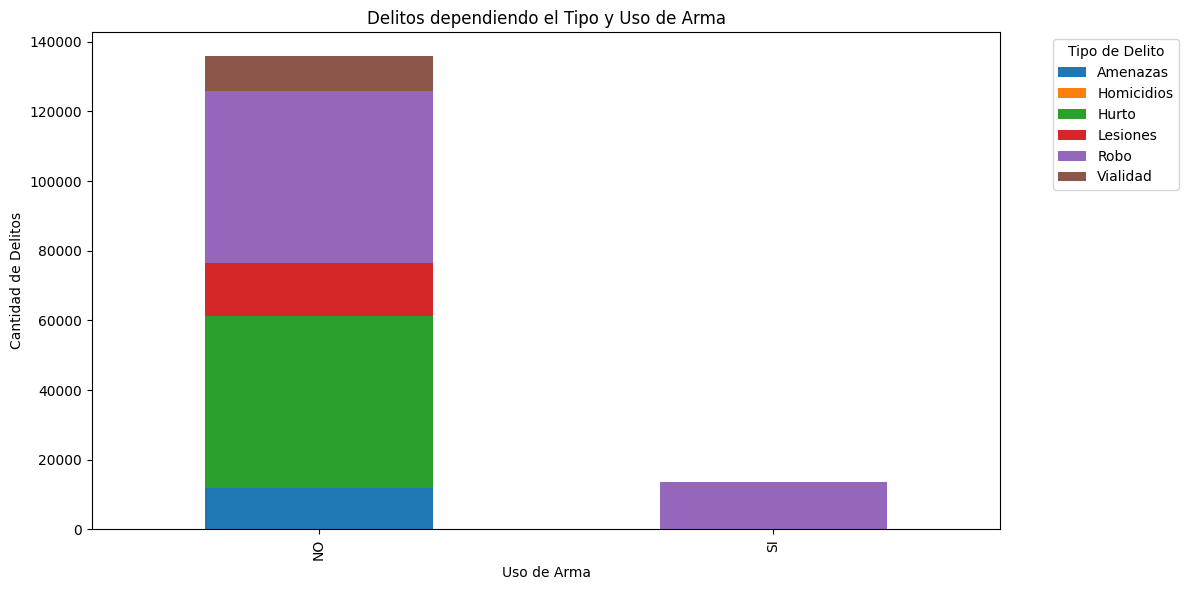

In [238]:
df_pivot = d2019.groupby(['uso_arma', 'tipo']).size().unstack(fill_value=0)
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Delitos dependiendo el Tipo y Uso de Arma')
plt.xlabel('Uso de Arma')
plt.ylabel('Cantidad de Delitos')
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

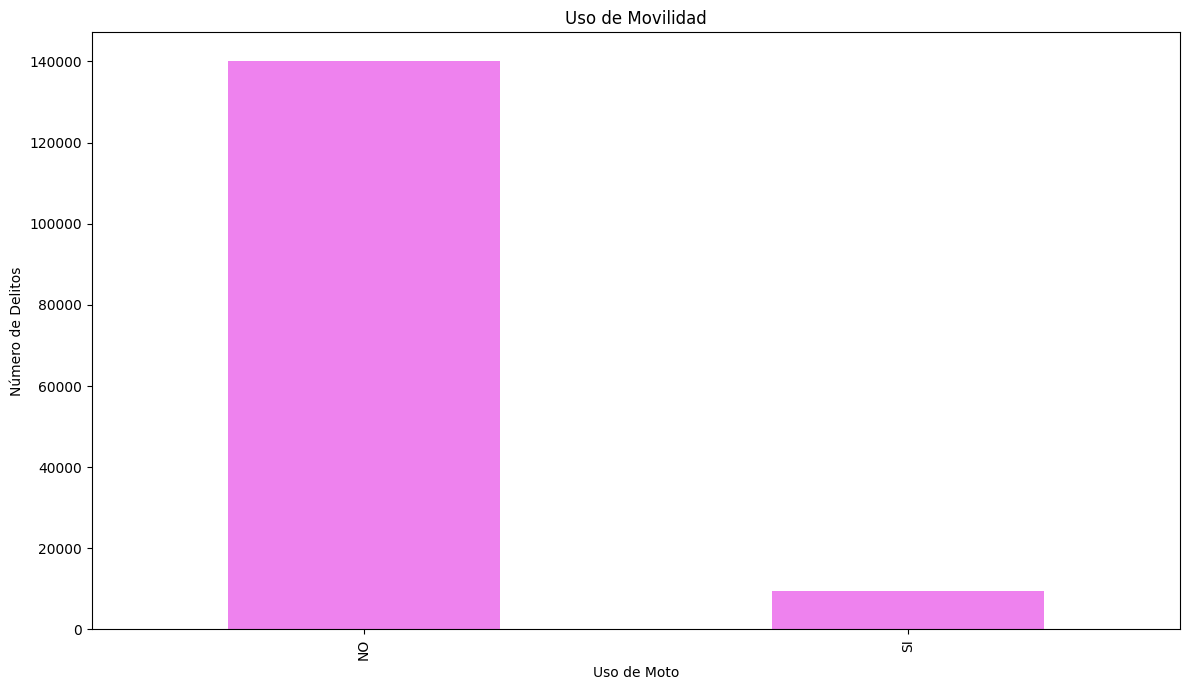

In [117]:
plt.figure(figsize=(12, 7))
d2019['uso_moto'].value_counts().head(10).plot(kind='bar', color='violet')
plt.title('Uso de Movilidad')
plt.xlabel('Uso de Moto')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

## 2023

In [22]:
# Por mes del 2023

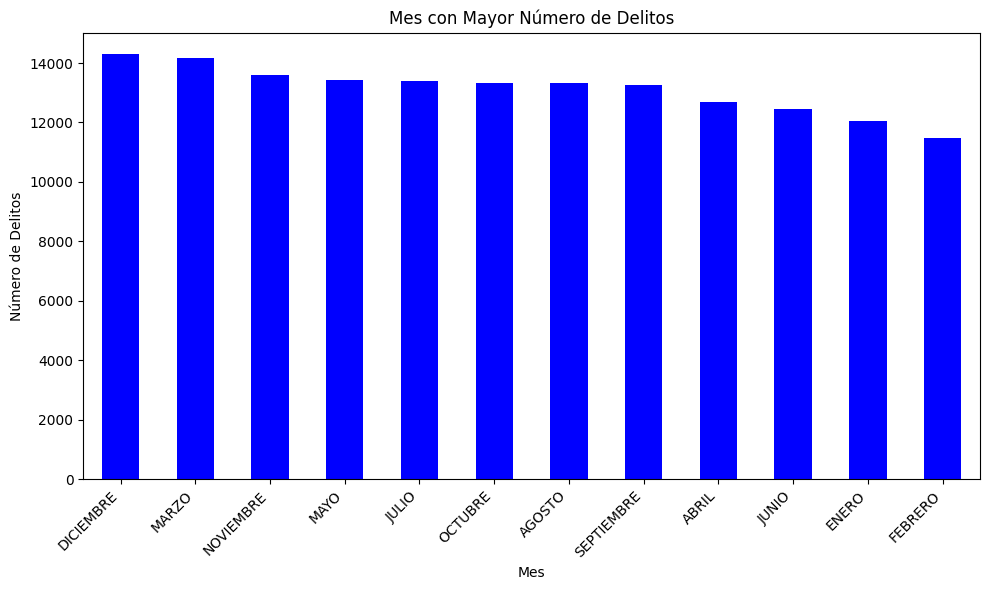

In [24]:
plt.figure(figsize=(10, 6))
d2023['mes'].value_counts().head(12).plot(kind='bar', color='blue')
plt.title('Mes con Mayor Número de Delitos')
plt.xlabel('Mes')
plt.ylabel('Número de Delitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# Por Zona Geográfica

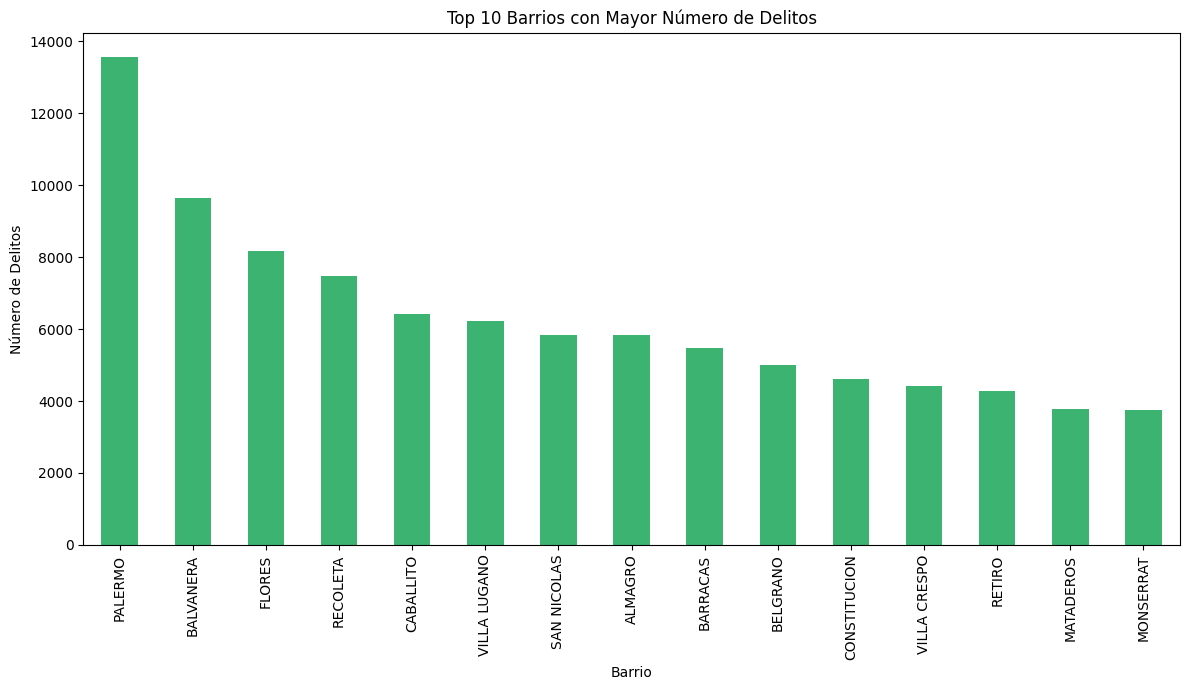

In [44]:
plt.figure(figsize=(12, 7))
d2023['barrio'].value_counts().head(15).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Barrios con Mayor Número de Delitos')
plt.xlabel('Barrio')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

In [32]:
# Por Comuna

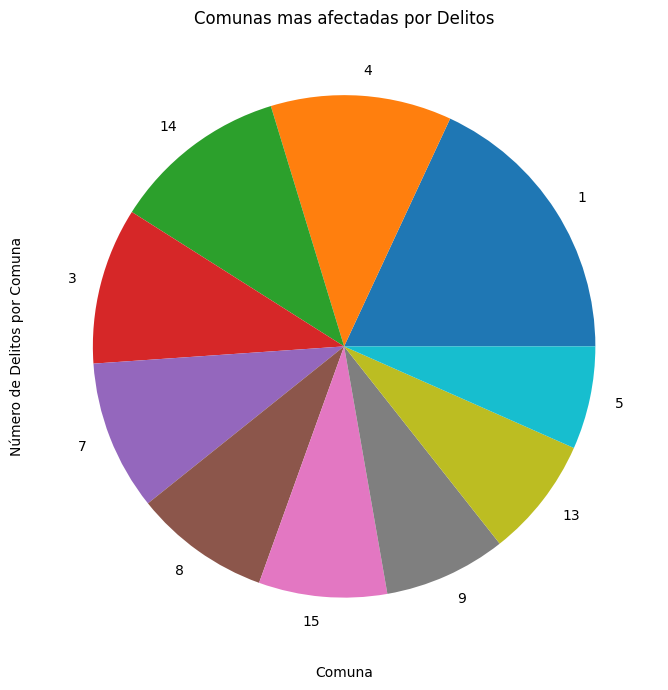

In [46]:
plt.figure(figsize=(12, 7))
d2023['comuna'].value_counts().head(10).plot(kind='pie', color='orange')
plt.title('Comunas mas afectadas por Delitos')
plt.xlabel('Comuna')
plt.ylabel('Número de Delitos por Comuna')
plt.tight_layout()
plt.show()

In [ ]:
#Por tipo de Delito

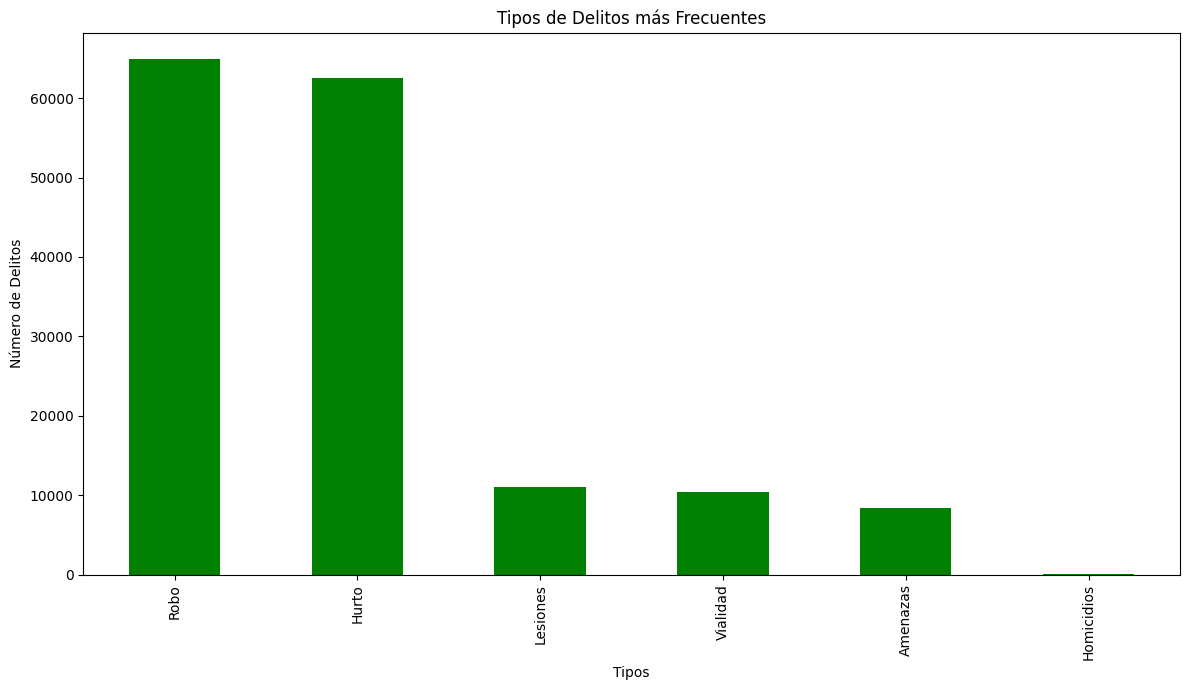

In [49]:
plt.figure(figsize=(12, 7))
d2023['tipo'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Tipos de Delitos más Frecuentes')
plt.xlabel('Tipos')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

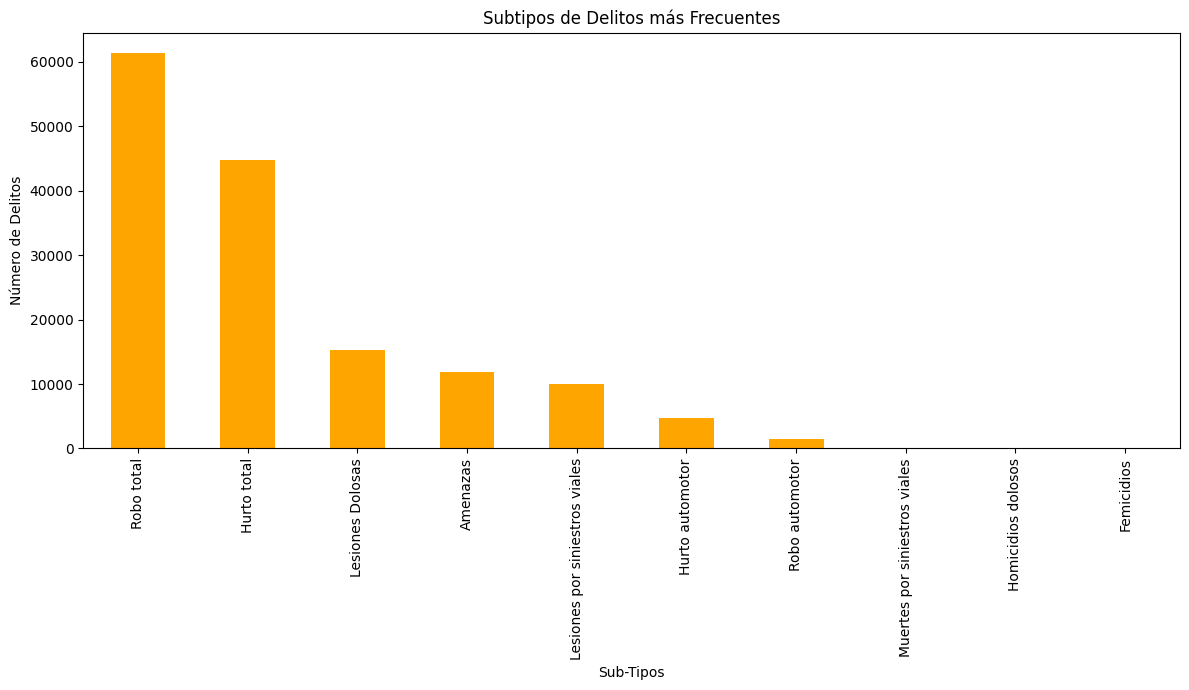

In [51]:
plt.figure(figsize=(12, 7))
d2019['subtipo'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Subtipos de Delitos más Frecuentes')
plt.xlabel('Sub-Tipos')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

In [ ]:
#Tipo de delito por barrio, los primeros tres delitos mas comunes

C:\Users\subri\AppData\Local\Temp\ipykernel_20956\1862213167.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=robo_por_barrio3.index, y=robo_por_barrio3.values,palette='Blues_d')


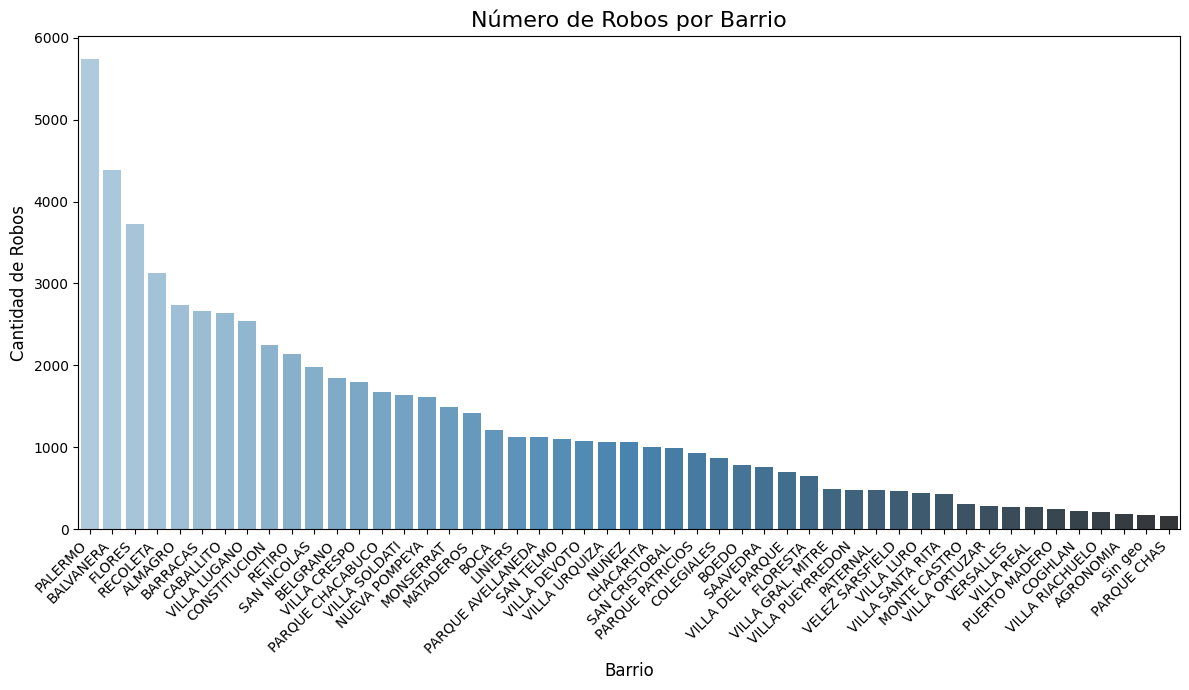

In [119]:
robos23=d2023[d2023['tipo']=='Robo']
robo_por_barrio3=robos23['barrio'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(x=robo_por_barrio3.index, y=robo_por_barrio3.values,palette='Blues_d')
plt.title('Número de Robos por Barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de Robos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\subri\AppData\Local\Temp\ipykernel_20956\2803230435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hurto_por_barrio3.index, y=hurto_por_barrio3.values,palette='Blues_d')


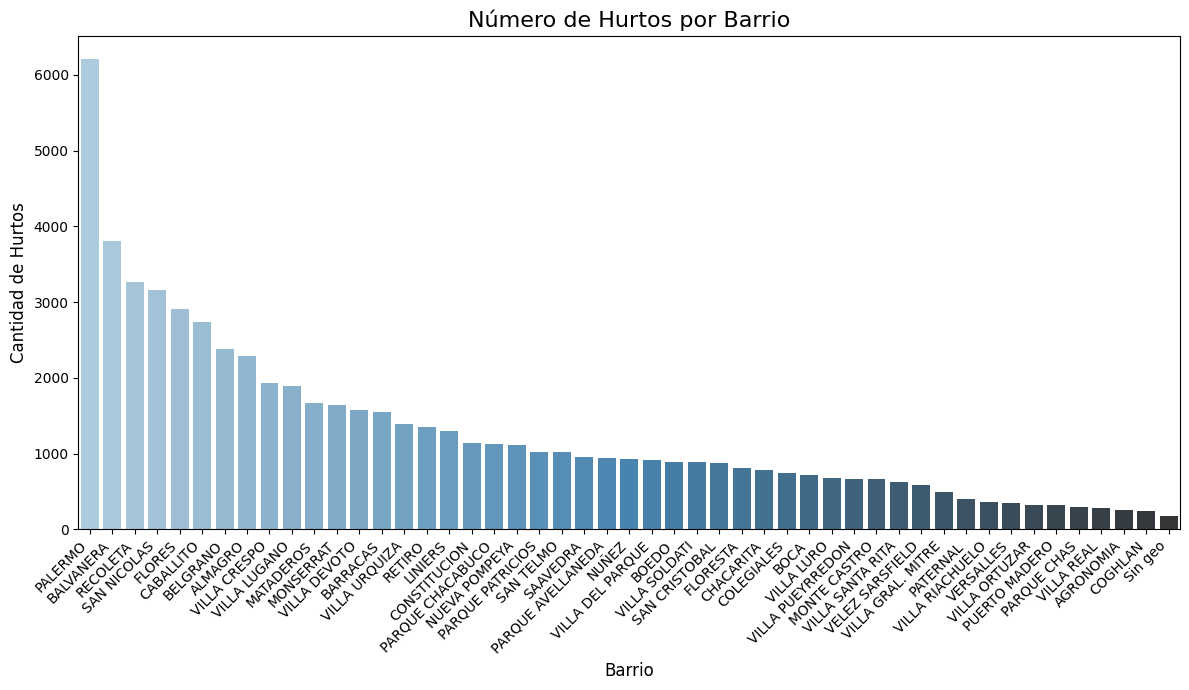

In [121]:
hurtos23=d2023[d2023['tipo']=='Hurto']
hurto_por_barrio3=hurtos23['barrio'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(x=hurto_por_barrio3.index, y=hurto_por_barrio3.values,palette='Blues_d')
plt.title('Número de Hurtos por Barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de Hurtos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\subri\AppData\Local\Temp\ipykernel_20956\3492965471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lesion_por_barrio3.index, y=lesion_por_barrio3.values,palette='Blues_d')


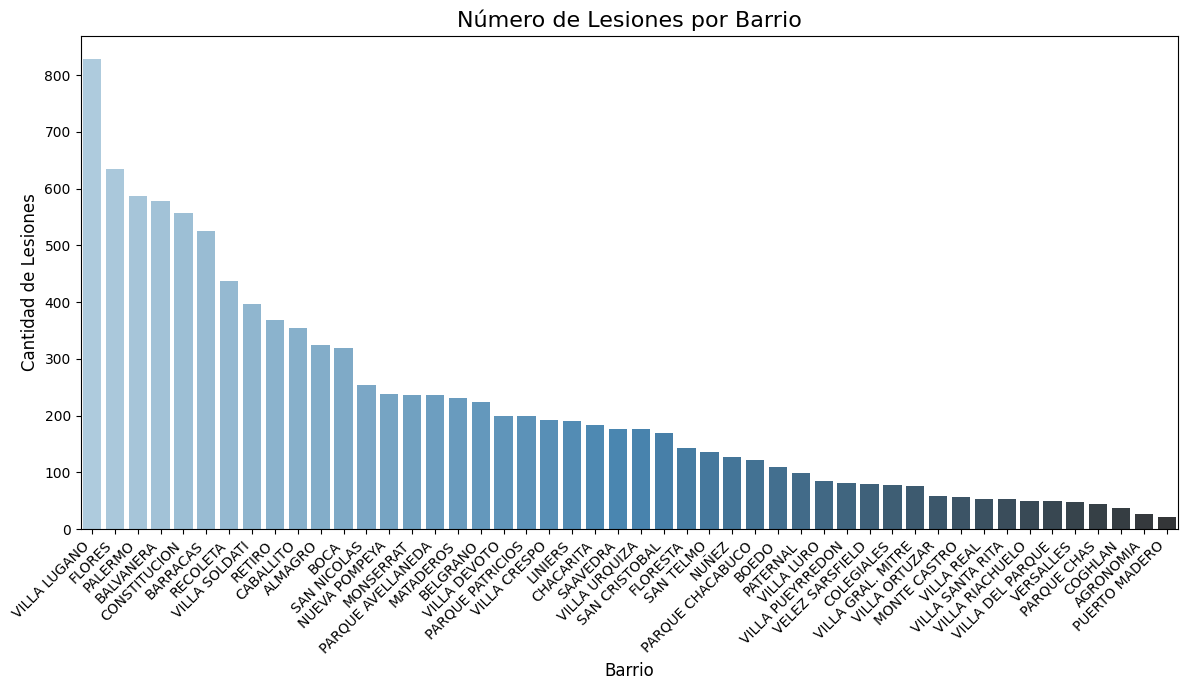

In [123]:
lesion23=d2023[d2023['tipo']=='Lesiones']
lesion_por_barrio3=lesion23['barrio'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(x=lesion_por_barrio3.index, y=lesion_por_barrio3.values,palette='Blues_d')
plt.title('Número de Lesiones por Barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de Lesiones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

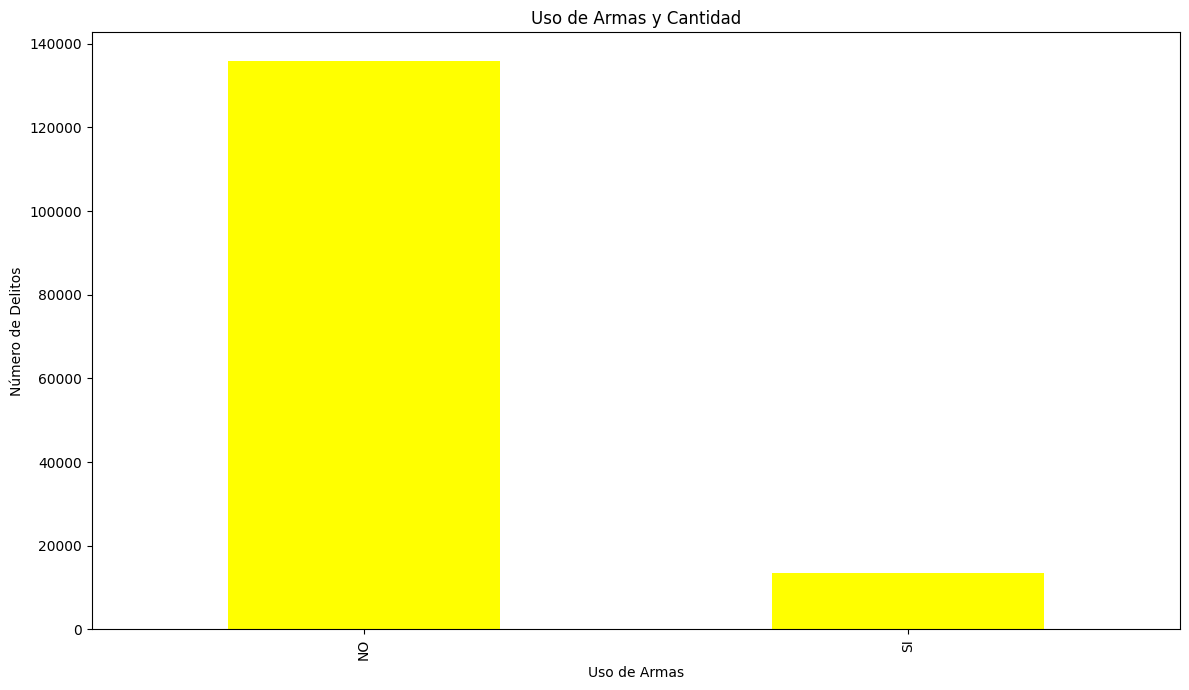

In [53]:
plt.figure(figsize=(12, 7))
d2019['uso_arma'].value_counts().head(10).plot(kind='bar', color='yellow')
plt.title('Uso de Armas y Cantidad')
plt.xlabel('Uso de Armas')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

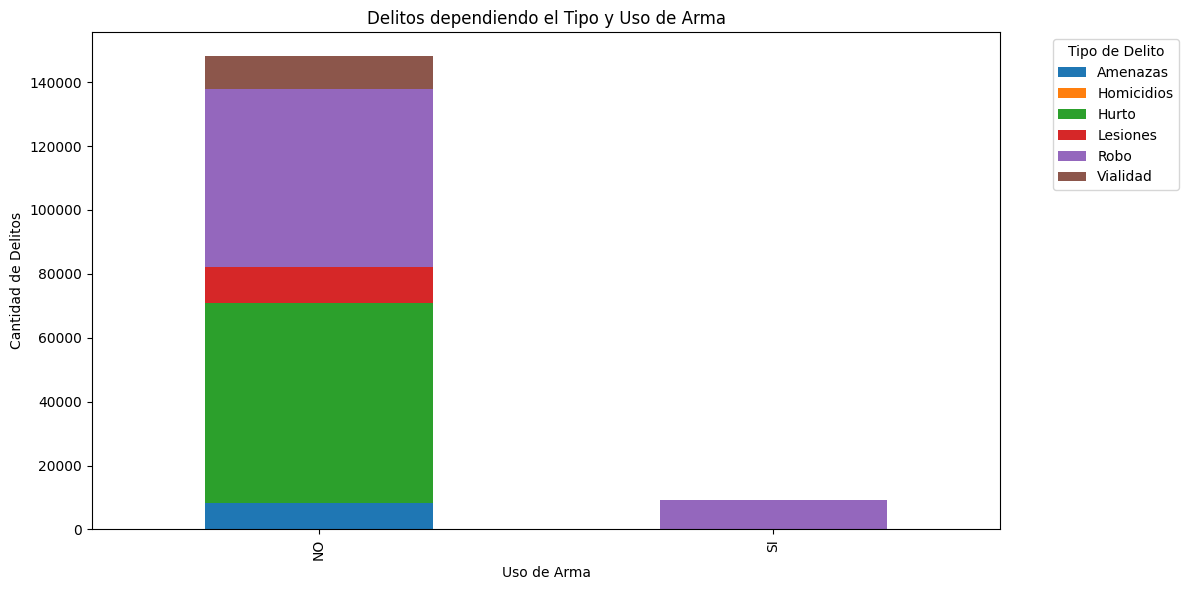

In [55]:
df_pivot = d2023.groupby(['uso_arma', 'tipo']).size().unstack(fill_value=0)
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Delitos dependiendo el Tipo y Uso de Arma')
plt.xlabel('Uso de Arma')
plt.ylabel('Cantidad de Delitos')
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

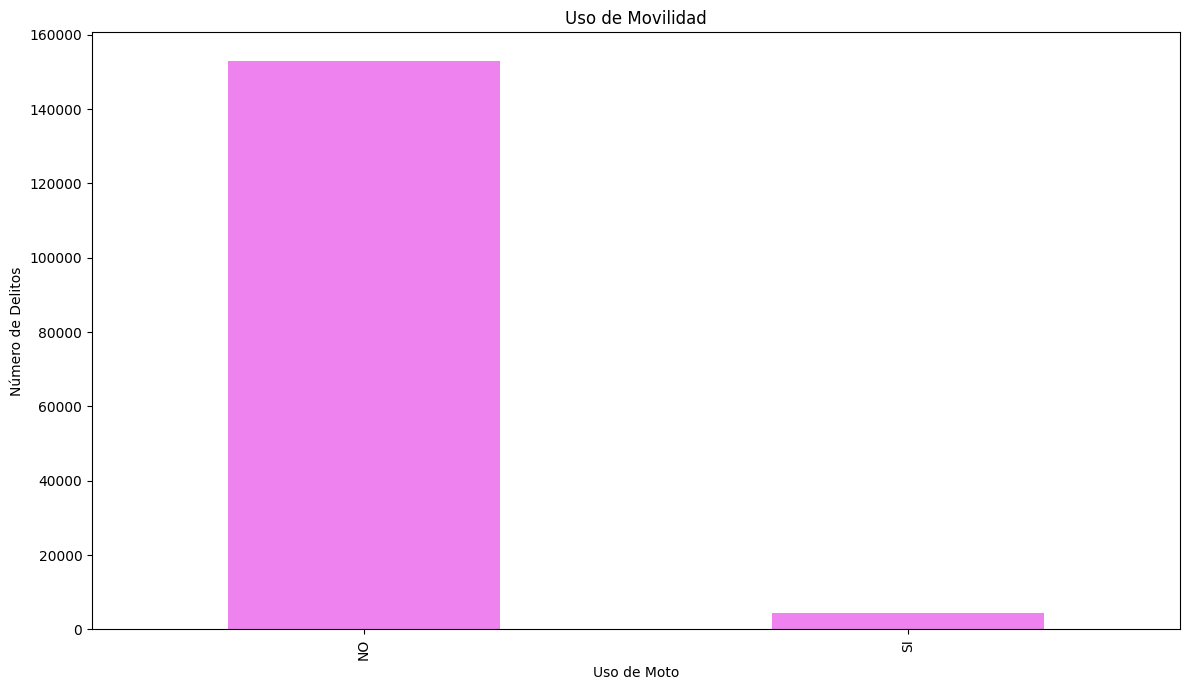

In [125]:
plt.figure(figsize=(12, 7))
d2023['uso_moto'].value_counts().head(10).plot(kind='bar', color='violet')
plt.title('Uso de Movilidad')
plt.xlabel('Uso de Moto')
plt.ylabel('Número de Delitos')
plt.tight_layout()
plt.show()

# Conclusión: 
    Hemos visto la diferencia de los delitos perpetuados en CABA en el 2019 y el 2023, siendo la mayor muestra del cambio, que aumentaron, también en este análisis se pudo ver en que áreas siguen siendo frecuentes, en que horarios y que tipo de delito es el mas frecuente y su uso respectivo de arma o movilidad. Así dejandonos a la vista en que aspectos de la seguridad mejorar.